In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import norm, shapiro
from scipy.stats import skew, kurtosis
from scipy.stats import t, norm, kstest
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

Data downloading

In [2]:
#original data

data = pd.read_excel('./data/data.xlsx')
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('Unnamed: 0')
data.index.name = None
data.head()

,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-01,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,434.334015,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-02,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,433.437988,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-03,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,430.010986,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-04,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,433.091003,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-05,23.237108,48.460758,0.802417,31.689501,36.953972,102.248108,131.25,14.895333,10.575768,17.599522,...,1.355960,3.471827,431.959991,1078.400024,13.949,888.599976,2.0885,535.099976,35.970001,2.325


In [3]:
#original data pct

data_pct = data.pct_change(1).dropna(axis=0)

data_pct.head()

,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.002063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.007907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-05,-0.025059,0.004562,0.016064,-0.005024,0.000998,0.004989,0.003824,0.000090,-0.033455,0.023756,...,0.008979,0.008765,-0.002611,0.003070,0.009553,0.006114,0.008694,-0.014458,-0.021491,-0.003856
2016-01-06,-0.019570,-0.018165,-0.041350,-0.001799,0.001400,0.002336,0.000610,-0.019648,-0.030759,0.010013,...,-0.020629,-0.003160,-0.006609,0.012519,0.000573,-0.016768,-0.003831,-0.056158,-0.055602,-0.024946


In [4]:
#monthly data

pre = data.groupby([data.index.year, data.index.month]).agg(["first", "last"])

data_m = pd.DataFrame(index = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.max()).values
                     , columns = data.columns)
for i in data.columns:
    data_m[i] = pre[i]['last'].values

print(data_m.shape)
data_m.head()

(72, 200)


,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-31,21.884941,48.272976,0.714751,28.943666,37.272622,113.594627,129.030004,13.001777,10.486300,18.774311,...,1.271577,3.566562,368.766998,1124.066691,14.295667,869.966654,2.055667,500.233337,32.286667,2.200667
2016-02-29,21.993832,45.111481,0.767877,27.625999,34.724033,106.418449,134.169998,12.795333,10.302759,18.556135,...,1.424951,3.830055,437.696991,1233.900024,14.896000,933.700012,2.128500,495.600006,33.750000,1.711000
2016-03-31,24.791685,48.968307,0.872432,29.681999,37.071915,113.564758,141.880005,15.318000,11.920929,19.299341,...,1.625557,4.514285,416.729004,1234.199951,15.460000,976.599976,2.181500,563.049988,38.340000,1.959000
2016-04-30,21.315228,44.434694,0.873820,33.383834,34.573415,117.356901,145.949997,16.073778,11.254282,18.910484,...,1.894011,5.388130,448.317993,1291.033285,17.744666,1080.233358,2.273167,626.933350,45.539998,2.132667
2016-05-31,22.853210,47.319805,1.146952,36.139500,36.612587,118.252678,140.539993,14.882000,11.910127,20.090649,...,2.005977,4.781901,531.385986,1214.800049,15.972000,978.700012,2.097500,547.750000,49.099998,2.288000


In [5]:
#monthly data pct

pre = data.groupby([data.index.year, data.index.month]).agg(["first", "last"])

data_pct_m = pd.DataFrame(index = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.max()).values
                     , columns = data.columns)
for i in data.columns:
    data_pct_m[i] = ( (pre[i]['last'] - pre[i]['first']) / pre[i]['first'] ).values

print(data_pct_m.shape)
data_pct_m.head()

(72, 200)


,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-31,-0.081791,0.000669,-0.094944,-0.091236,0.009629,0.116513,-0.013155,-0.127046,-0.041632,0.092092,...,-0.053811,0.036291,-0.150960,0.045546,0.034643,-0.014983,-0.007164,-0.078675,-0.121690,-0.057127
2016-02-29,0.008137,-0.063328,0.074207,-0.038778,-0.072114,-0.070988,0.042826,-0.025439,-0.026946,-0.017185,...,0.110019,0.067139,0.173274,0.093980,0.039570,0.074701,0.037533,-0.011962,0.067362,-0.204926
2016-03-31,0.084154,0.050399,0.087939,0.025214,0.036366,0.038973,0.036074,0.233002,0.119783,0.038174,...,0.139653,0.181896,-0.042273,0.003170,0.049345,0.043265,0.018678,0.087809,0.114535,0.124569
2016-04-30,-0.148044,-0.098135,-0.012817,0.115583,-0.073564,0.015940,0.015022,0.014801,-0.075665,-0.028236,...,0.184284,0.211440,0.072634,0.056319,0.179675,0.132795,0.051905,0.115937,0.237836,0.090320
2016-05-31,0.072536,0.059713,0.306836,0.069590,0.056345,0.004821,-0.040158,-0.075474,0.057478,0.058622,...,0.061050,-0.112104,0.175958,-0.060383,-0.097644,-0.095945,-0.074904,-0.124953,0.087245,0.096135


In [6]:
rate = pd.read_csv('./data/rates.csv', sep=',')
rate = rate[['Дата', 'Цена']]
rate[['Day', 'Month', 'Year']] = rate['Дата'].str.split('.',expand=True)
rate['Date'] = rate['Day'] + '-' + rate['Month'] + '-' + rate['Year']
rate = rate.drop(['Дата', 'Day', 'Month', 'Year'], axis=1)
rate['Date'] = pd.to_datetime(rate['Date'], format='%d-%m-%Y')
rate = rate.set_index('Date')
rate.index.name = None
rate['Цена'] = rate['Цена'].str.replace(',', '.')
rate['Цена'] = rate['Цена'].astype(float) / 100
rate.rename(columns={'Цена': 'Rate'}, inplace=True)
rate.head()

,Rate
2021-12-01,0.00056
2021-11-01,0.00106
2021-10-01,0.00056
2021-09-01,0.00053
2021-08-01,0.00035


Daily data

Shapiro-Wilk Normality Test

In [7]:
#Shapiro-Wilk Test to Check if a Distribution is Normally Distributed

#all data
sw_test = []

for i in data_pct.columns:
    s, p = shapiro(data_pct[i])
    sw_test.append([s,p])
    
sw_test = pd.DataFrame(sw_test)

sw_test['Normality Test 0.1'] = sw_test[1] < 0.1
sw_test['Normality Test 0.05'] = sw_test[1] < 0.05
sw_test['Normality Test 0.01'] = sw_test[1] < 0.01

print('ДАННЫЕ ЗА 6 ЛЕТ')
print(sw_test['Normality Test 0.1'].value_counts())
print('Out of '+str(len(data_pct.columns)))
print('-----------------------------')
print(sw_test['Normality Test 0.05'].value_counts())
print('Out of '+str(len(data_pct.columns)))
print('-----------------------------')
print(sw_test['Normality Test 0.01'].value_counts())
print('Out of '+str(len(data_pct.columns)))
print('\n')

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

#year data
sw_test = []

for i in data_pct.columns:
    years = list(chunks(data_pct[i], 365))[:-1]
    for j in years:
        s, p = shapiro(j)
        sw_test.append([s,p])
    
sw_test = pd.DataFrame(sw_test)

sw_test['Normality Test 0.1'] = sw_test[1] < 0.1
sw_test['Normality Test 0.05'] = sw_test[1] < 0.05
sw_test['Normality Test 0.01'] = sw_test[1] < 0.01

print('ДАННЫЕ ЗА 1 ГОД')
print(sw_test['Normality Test 0.1'].value_counts())
print('Out of '+str(len(data_pct.columns)*6))
print('-----------------------------')
print(sw_test['Normality Test 0.05'].value_counts())
print('Out of '+str(len(data_pct.columns)*6))
print('-----------------------------')
print(sw_test['Normality Test 0.01'].value_counts())
print('Out of '+str(len(data_pct.columns)*6))
print('\n')


#month data
sw_test = []

for i in data_pct.columns:
    years = list(chunks(data_pct[i], 30))[:-1]
    for j in years:
        s, p = shapiro(j)
        sw_test.append([s,p])
    
sw_test = pd.DataFrame(sw_test)

sw_test['Normality Test 0.1'] = sw_test[1] < 0.1
sw_test['Normality Test 0.05'] = sw_test[1] < 0.05
sw_test['Normality Test 0.01'] = sw_test[1] < 0.01

print('ДАННЫЕ ЗА 1 МЕСЯЦ')
print(sw_test['Normality Test 0.1'].value_counts())
print('Out of '+str(len(data_pct.columns)*6*12))
print('-----------------------------')
print(sw_test['Normality Test 0.05'].value_counts())
print('Out of '+str(len(data_pct.columns)*6*12))
print('-----------------------------')
print(sw_test['Normality Test 0.01'].value_counts())
print('Out of '+str(len(data_pct.columns)*6*12))

ДАННЫЕ ЗА 6 ЛЕТ
Normality Test 0.1
True    200
Name: count, dtype: int64
Out of 200
-----------------------------
Normality Test 0.05
True    200
Name: count, dtype: int64
Out of 200
-----------------------------
Normality Test 0.01
True    200
Name: count, dtype: int64
Out of 200


ДАННЫЕ ЗА 1 ГОД
Normality Test 0.1
True    1200
Name: count, dtype: int64
Out of 1200
-----------------------------
Normality Test 0.05
True    1200
Name: count, dtype: int64
Out of 1200
-----------------------------
Normality Test 0.01
True    1200
Name: count, dtype: int64
Out of 1200


ДАННЫЕ ЗА 1 МЕСЯЦ
Normality Test 0.1
True     10423
False     4177
Name: count, dtype: int64
Out of 14400
-----------------------------
Normality Test 0.05
True     9026
False    5574
Name: count, dtype: int64
Out of 14400
-----------------------------
Normality Test 0.01
False    8408
True     6192
Name: count, dtype: int64
Out of 14400


RSS distribution test

In [ ]:
from distfit import distfit
from tqdm import tqdm
from IPython.display import clear_output

d = {}

dist = distfit()

for i in tqdm(data_pct.columns):
    for j in tqdm(list(chunks(data_pct[i], 30))[:-1]):
        x = dist.fit_transform(data_pct[i])
        clear_output(wait=True)
        if x['model']['name'] in d.keys():
            d[x['model']['name']] += 1
        else:
            d[x['model']['name']] = 1

In [ ]:
d

Returns scatter

C:\Users\kirik\AppData\Local\Temp\ipykernel_12648\1094875847.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_pct[i].index


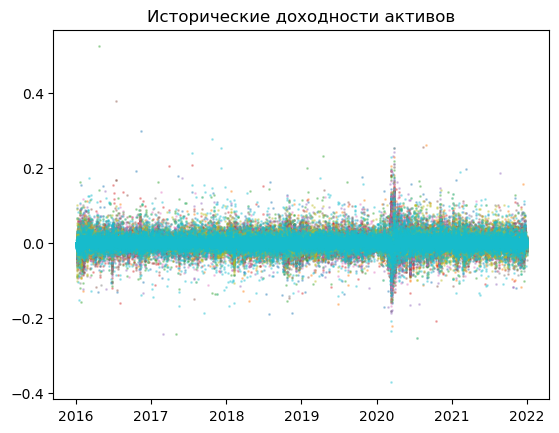

In [8]:
colors = [plt.cm.tab10(i/float(len(data_pct.columns[:-2])-1)) for i in range(len(data_pct.columns[:-2]))]

plt.title('Исторические доходности активов')

for j,i in enumerate(data_pct.columns[:-2]):
    plt.scatter(data_pct[i].index
                , data_pct[i]
                , c=colors[j]
                , label=data_pct.index
               , alpha=0.3
               , s=1)

plt.show()

Correlation analysis

In [9]:
per = data_pct.corr(method='pearson')
ken = data_pct.corr(method='kendall')
sper = data_pct.corr(method='spearman')

<Figure size 5000x1000 with 0 Axes>

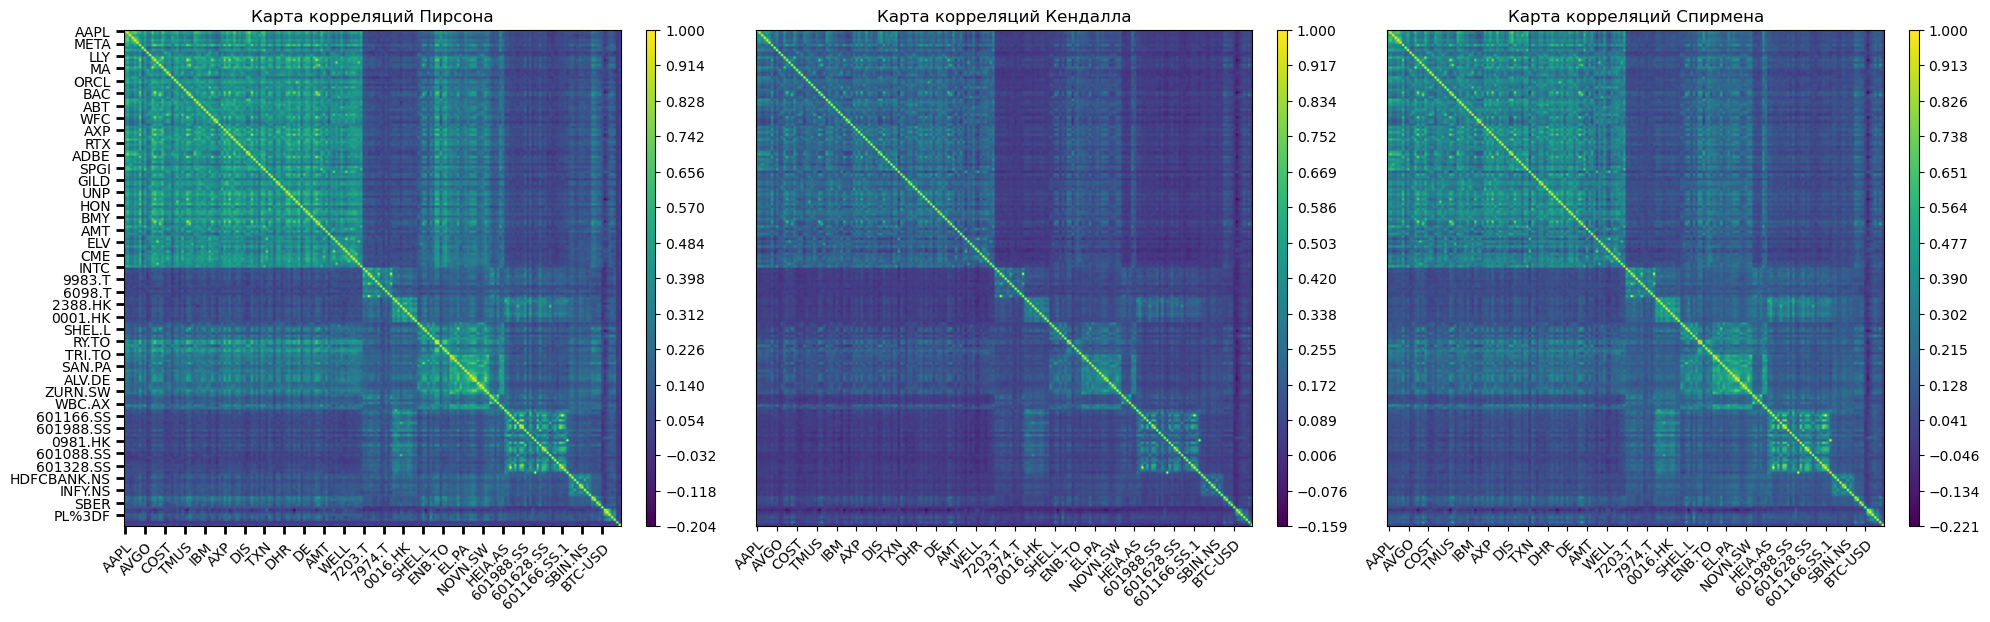

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

plt.figure(figsize=(50,10))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 15))

im1 = ax1.imshow(per)
ax1.set_title('Карта корреляций Пирсона')
ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("right", size="2%", pad="5%")
cb1 = fig.colorbar(im1, cax=cax1, ticks=np.linspace(per.values.max(), per.values.min(), num=15))

im2 = ax2.imshow(ken)
ax2.set_title('Карта корреляций Кендалла')
ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("right", size="2%", pad="5%")
cb2 = fig.colorbar(im2, cax=cax2, ticks=np.linspace(ken.values.max(), ken.values.min(), num=15))

im3 = ax3.imshow(sper)
ax3.set_title('Карта корреляций Спирмена')
ax3_divider = make_axes_locatable(ax3)
cax3 = ax3_divider.append_axes("right", size="2%", pad="5%")
cb3 = fig.colorbar(im3, cax=cax3, ticks=np.linspace(sper.values.max(), sper.values.min(), num=15))


ax1.tick_params(length=6, width=2, labelsize=10)

ax1.set_yticks(range(0, len(data_pct.columns), 5), labels=data_pct.columns[0::5])
ax1.set_xticks(range(0, len(data_pct.columns), 8), labels=data_pct.columns[0::8],
              rotation=45, ha="right", rotation_mode="anchor")
ax2.set_yticks([], labels=[])
ax2.set_xticks(range(0, len(data_pct.columns), 8), labels=data_pct.columns[0::8],
              rotation=45, ha="right", rotation_mode="anchor")
ax3.set_yticks([], labels=[])
ax3.set_xticks(range(0, len(data_pct.columns), 8), labels=data_pct.columns[0::8],
              rotation=45, ha="right", rotation_mode="anchor")

fig.tight_layout()

plt.show()

Shapiro-Wilk Normality Test

In [11]:
sw_test = []

for i in data_pct_m.columns:
    s, p = shapiro(data_pct_m[i])
    sw_test.append([s,p])
    
sw_test = pd.DataFrame(sw_test)

sw_test['Normality Test 0.1'] = sw_test[1] < 0.1
sw_test['Normality Test 0.05'] = sw_test[1] < 0.05
sw_test['Normality Test 0.01'] = sw_test[1] < 0.01

print('МЕСЯЧНЫЕ ДАННЫЕ ДОХОДНОСТЕЙ')
print(sw_test['Normality Test 0.1'].value_counts())
print('Out of '+str(len(data_pct.columns)))
print('-----------------------------')
print(sw_test['Normality Test 0.05'].value_counts())
print('Out of '+str(len(data_pct.columns)))
print('-----------------------------')
print(sw_test['Normality Test 0.01'].value_counts())
print('Out of '+str(len(data_pct.columns)))
print('-----------------------------')

МЕСЯЧНЫЕ ДАННЫЕ ДОХОДНОСТЕЙ
Normality Test 0.1
False    119
True      81
Name: count, dtype: int64
Out of 200
-----------------------------
Normality Test 0.05
False    134
True      66
Name: count, dtype: int64
Out of 200
-----------------------------
Normality Test 0.01
False    158
True      42
Name: count, dtype: int64
Out of 200
-----------------------------


In [ ]:
from distfit import distfit
from tqdm import tqdm
from IPython.display import clear_output

d = {}

dist = distfit()

for i in tqdm(data_pct_m.columns):
    x = dist.fit_transform(data_pct_m[i])
    clear_output(wait=True)
    if x['model']['name'] in d.keys():
        d[x['model']['name']] += 1
    else:
        d[x['model']['name']] = 1

In [ ]:
d

C:\Users\kirik\AppData\Local\Temp\ipykernel_12648\554734675.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_pct_m[i].index


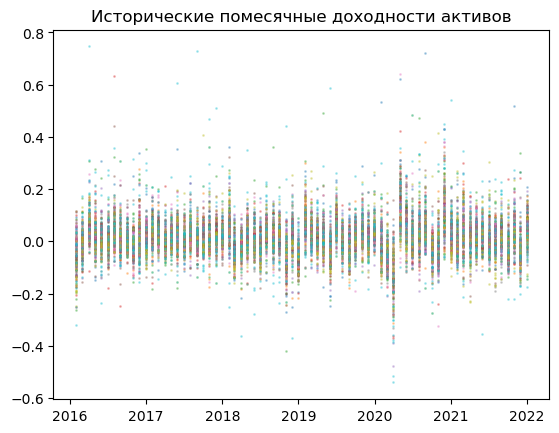

In [12]:
plt.title('Исторические помесячные доходности активов')

for j,i in enumerate(data_pct_m.columns[:-2]):
    plt.scatter(data_pct_m[i].index
                , data_pct_m[i]
                , c=colors[j]
                , label=data_pct_m.index
               , alpha=0.3
               , s=1)

plt.show()

In [13]:
per = data_pct_m.corr(method='pearson')
ken = data_pct_m.corr(method='kendall')
sper = data_pct_m.corr(method='spearman')

<Figure size 5000x1000 with 0 Axes>

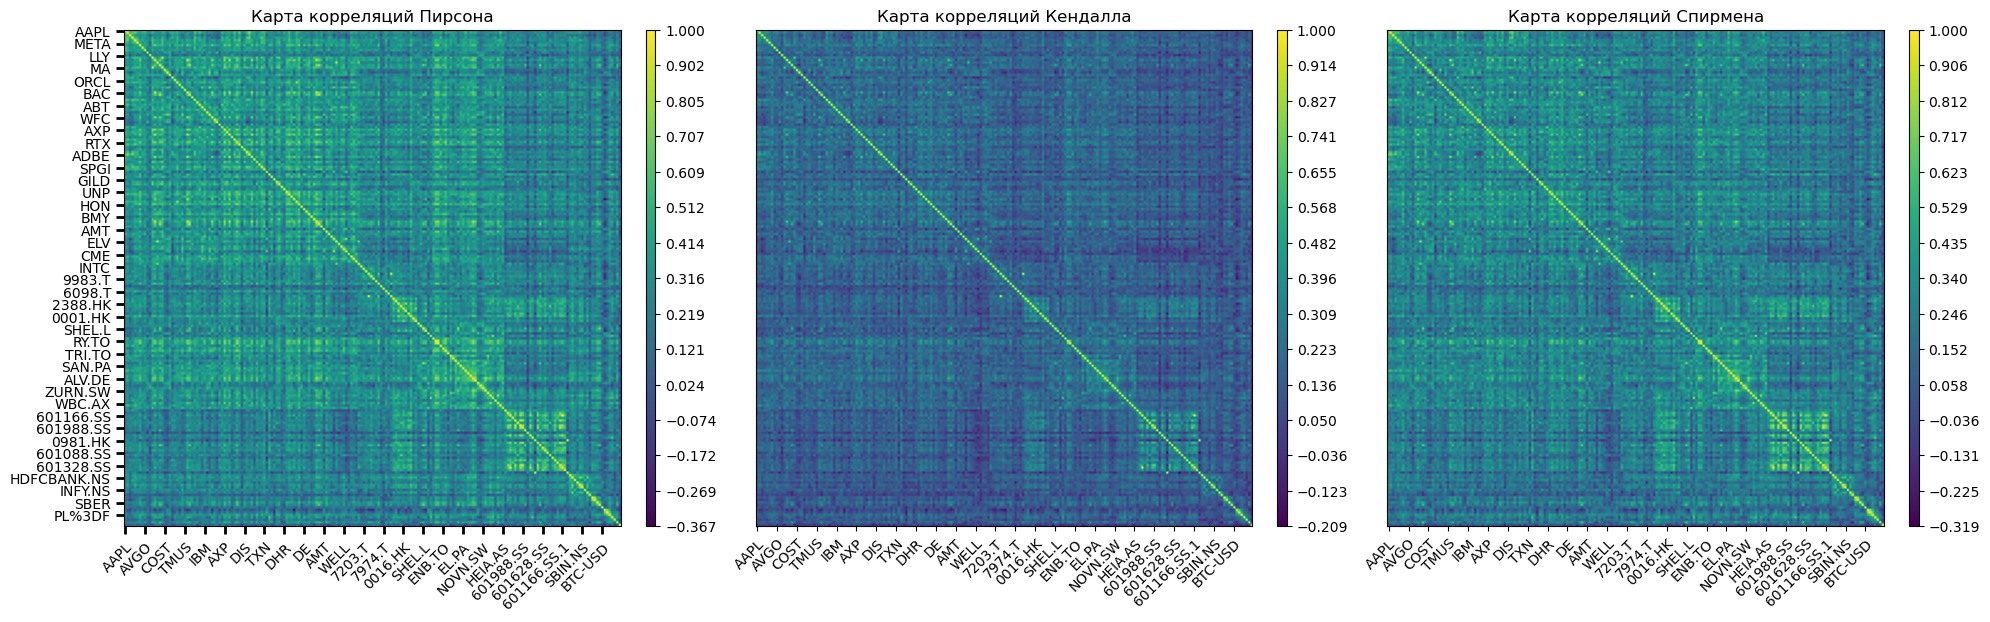

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

plt.figure(figsize=(50,10))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 15))

im1 = ax1.imshow(per)
ax1.set_title('Карта корреляций Пирсона')
ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("right", size="2%", pad="5%")
cb1 = fig.colorbar(im1, cax=cax1, ticks=np.linspace(per.values.max(), per.values.min(), num=15))

im2 = ax2.imshow(ken)
ax2.set_title('Карта корреляций Кендалла')
ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("right", size="2%", pad="5%")
cb2 = fig.colorbar(im2, cax=cax2, ticks=np.linspace(ken.values.max(), ken.values.min(), num=15))

im3 = ax3.imshow(sper)
ax3.set_title('Карта корреляций Спирмена')
ax3_divider = make_axes_locatable(ax3)
cax3 = ax3_divider.append_axes("right", size="2%", pad="5%")
cb3 = fig.colorbar(im3, cax=cax3, ticks=np.linspace(sper.values.max(), sper.values.min(), num=15))


ax1.tick_params(length=6, width=2, labelsize=10)

ax1.set_yticks(range(0, len(data_pct.columns), 5), labels=data_pct.columns[0::5])
ax1.set_xticks(range(0, len(data_pct.columns), 8), labels=data_pct.columns[0::8],
              rotation=45, ha="right", rotation_mode="anchor")
ax2.set_yticks([], labels=[])
ax2.set_xticks(range(0, len(data_pct.columns), 8), labels=data_pct.columns[0::8],
              rotation=45, ha="right", rotation_mode="anchor")
ax3.set_yticks([], labels=[])
ax3.set_xticks(range(0, len(data_pct.columns), 8), labels=data_pct.columns[0::8],
              rotation=45, ha="right", rotation_mode="anchor")

fig.tight_layout()

plt.show()

Time Series Analysis

In [15]:
#daily prices
yp_df = []
for drift in [1,2,3,4,5,6,7,8,9,10]:
    lst = []
    for j in data.columns:
        lst.append(np.corrcoef(data[j][drift:], pd.Series(data[j]).shift(drift)[drift:])[0][1])
    yp_df.append(lst)


#monthly daily prices
mp_df = []
for drift in [1,2,3,4,5,6,7,8,9,10]:
    lst = []
    for j in data.columns:
        lst.append(np.corrcoef(data_m[j][drift:], pd.Series(data_m[j]).shift(drift)[drift:])[0][1])
    mp_df.append(lst)
    
    
#daily returns
yr_df = []
for drift in [1,2,3,4,5,6,7,8,9,10]:
    lst = []
    for j in data.columns:
        lst.append(np.corrcoef(data_pct[j][drift:], pd.Series(data_pct[j]).shift(drift)[drift:])[0][1])
    yr_df.append(lst)
    

#monthly returns
mr_df = []
for drift in [1,2,3,4,5,6,7,8,9,10]:
    lst = []
    for j in data.columns:
        lst.append(np.corrcoef(data_pct_m[j][drift:], pd.Series(data_pct_m[j]).shift(drift)[drift:])[0][1])
    mr_df.append(lst)

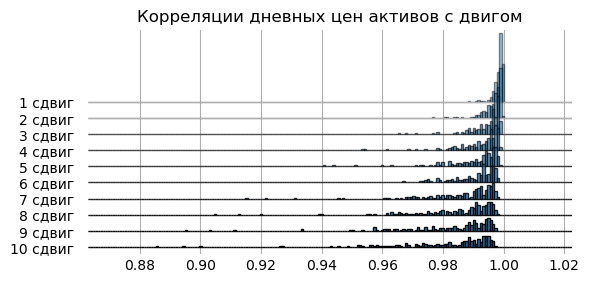

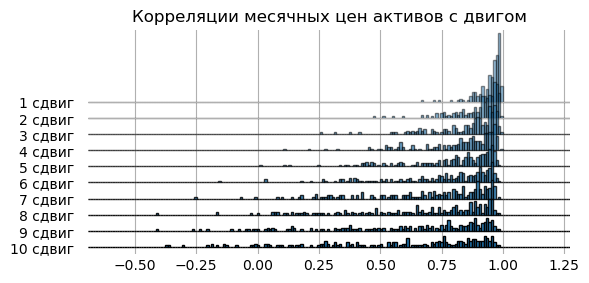

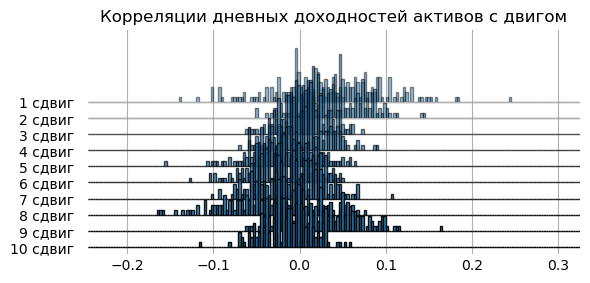

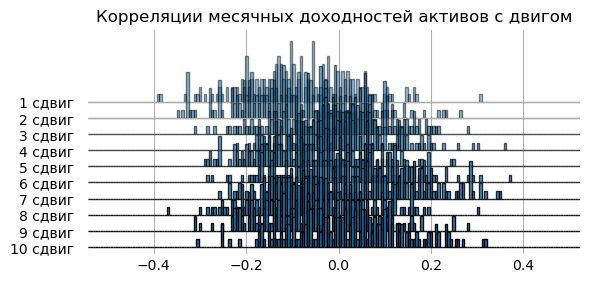

In [16]:
from matplotlib import cm
import joypy

fig1, ax1 = joypy.joyplot(yp_df
                          , hist=True
                          , bins=200
                          , grid=True
                          , labels=[str(i)+" сдвиг" for i in [1,2,3,4,5,6,7,8,9,10]]
                          , title="Корреляции дневных цен активов с двигом"
                        , figsize=(6, 3), fade=True)

fig2, ax2 = joypy.joyplot(mp_df
                          , hist=True
                          , bins=200
                          , grid=True
                          , labels=[str(i)+" сдвиг" for i in [1,2,3,4,5,6,7,8,9,10]]
                          , title="Корреляции месячных цен активов с двигом"
                        , figsize=(6, 3), fade=True)

fig3, ax3 = joypy.joyplot(yr_df
                          , hist=True
                          , bins=200
                          , grid=True
                          , labels=[str(i)+" сдвиг" for i in [1,2,3,4,5,6,7,8,9,10]]
                          , title="Корреляции дневных доходностей активов с двигом"
                        , figsize=(6, 3), fade=True)

fig4, ax4 = joypy.joyplot(mr_df
                          , hist=True
                          , bins=200
                          , grid=True
                          , labels=[str(i)+" сдвиг" for i in [1,2,3,4,5,6,7,8,9,10]]
                          , title="Корреляции месячных доходностей активов с двигом"
                        , figsize=(6, 3), fade=True)


PACF distribution for daily returns

In [17]:
from scipy import linalg, stats

def partial_corr(C):
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

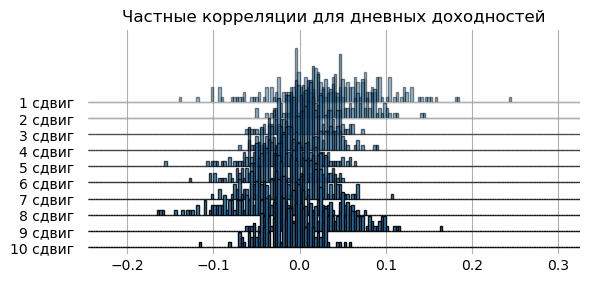

In [18]:
pacf_dist = []
for drift in [1,2,3,4,5,6,7,8,9,10]:
    lst = []
    for j in data.columns:
        pre1 = data_pct[j][drift:].values
        pre2 = data_pct[j].shift(drift)[drift:].values
        pre = list(map(lambda x,y: [x,y], pre1, pre2))
        lst.append(partial_corr(pre)[0][1])
    pacf_dist.append(lst)
    
fig5, ax5 = joypy.joyplot(pacf_dist
                          , hist=True
                          , bins=200
                          , grid=True
                          , labels=[str(i)+" сдвиг" for i in [1,2,3,4,5,6,7,8,9,10]]
                          , title="Частные корреляции для дневных доходностей"
                        , figsize=(6, 3), fade=True)

In [19]:
pd.DataFrame(np.array([[np.mean(i) for i in mr_df], [np.mean(i) for i in pacf_dist]]).T
             , index=[str(i)+" сдвиг" for i in [1,2,3,4,5,6,7,8,9,10]]
            , columns=['Средние значения ACF для сдвигов', 'Средние значения PACF для сдвигов'])

,Средние значения ACF для сдвигов,Средние значения PACF для сдвигов
1 сдвиг,-0.083944,0.031975
2 сдвиг,-0.098062,0.038858
3 сдвиг,-0.007574,0.006116
4 сдвиг,0.006508,0.006101
5 сдвиг,-0.068200,-0.018768
6 сдвиг,0.010960,-0.022094
7 сдвиг,0.053914,-0.004230
8 сдвиг,-0.064787,-0.037164
9 сдвиг,-0.054808,0.022844
10 сдвиг,0.020210,-0.013310


Stationary ADF, KPSS Tests

In [20]:
from statsmodels.tsa.stattools import adfuller, kpss

In [21]:
#daily prices
ad = []
for j in data.columns:
    ad.append(adfuller(data[j])[1])

print('ADF-test для дневных цен активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i > 0.1))))
print('Н0 отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i > 0.05))))
print('Н0 отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i < 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i > 0.01))))
print('Н0 отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i < 0.01))) + '\n')
print('Всего тестов: ' + str(len(ad)))
print('----------------------------------------------------')

#monthly prices
ad = []
for j in data.columns:
    ad.append(adfuller(data_m[j])[1])

print('ADF-test для месячных цен активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i > 0.1))))
print('Н0 отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i > 0.05))))
print('Н0 отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i < 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i > 0.01))))
print('Н0 отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i < 0.01))) + '\n')
print('Всего тестов: ' + str(len(ad)))
print('----------------------------------------------------')

#daily returns
ad = []
for j in data.columns:
    ad.append(adfuller(data_pct[j])[1])

print('ADF-test для дневных доходностей активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i > 0.1))))
print('Н0 отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i > 0.05))))
print('Н0 отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i < 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i > 0.01))))
print('Н0 отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i < 0.01))) + '\n')
print('Всего тестов: ' + str(len(ad)))
print('----------------------------------------------------')

#monthly returns
ad = []
for j in data.columns:
    ad.append(adfuller(data_pct_m[j])[1])

print('ADF-test для месячных доходностей активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i > 0.1))))
print('Н0 отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in ad if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i > 0.05))))
print('Н0 отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in ad if i < 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i > 0.01))))
print('Н0 отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in ad if i < 0.01))) + '\n')
print('Всего тестов: ' + str(len(ad)))
print('----------------------------------------------------')

ADF-test для дневных цен активов 

Уровень значимости p=0.1
H0 не отвергаем. Нестационарных рядов для p=0.1: 187
Н0 отвергаем. Стационарных рядов для p=0.1: 13

Уровень значимости p=0.05
H0 не отвергаем. Нестационарных рядов для p=0.05: 194
Н0 отвергаем. Стационарных рядов для p=0.05: 6

Уровень значимости p=0.01
H0 не отвергаем. Нестационарных рядов для p=0.01: 198
Н0 отвергаем. Стационарных рядов для p=0.01: 2

Всего тестов: 200
----------------------------------------------------
ADF-test для месячных цен активов 

Уровень значимости p=0.1
H0 не отвергаем. Нестационарных рядов для p=0.1: 186
Н0 отвергаем. Стационарных рядов для p=0.1: 14

Уровень значимости p=0.05
H0 не отвергаем. Нестационарных рядов для p=0.05: 193
Н0 отвергаем. Стационарных рядов для p=0.05: 7

Уровень значимости p=0.01
H0 не отвергаем. Нестационарных рядов для p=0.01: 197
Н0 отвергаем. Стационарных рядов для p=0.01: 3

Всего тестов: 200
----------------------------------------------------
ADF-test для дневных до

KPSS test

In [22]:

#daily prices
kpsst = []
for j in data.columns:
    kpsst.append(kpss(data[j])[1])

print('KPSS-test для дневных цен активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i >= 0.1))))
print('Н0 отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i > 0.05))))
print('Н0 отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i <= 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i > 0.01))))
print('Н0 отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i <= 0.01))) + '\n')
print('Всего тестов: ' + str(len(kpsst)))
print('----------------------------------------------------')

#monthly prices
kpsst = []
for j in data.columns:
    kpsst.append(kpss(data_m[j])[1])

print('KPSS-test для месячных цен активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i >= 0.1))))
print('Н0 отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i > 0.05))))
print('Н0 отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i <= 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i > 0.01))))
print('Н0 отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i <= 0.01))) + '\n')
print('Всего тестов: ' + str(len(kpsst)))
print('----------------------------------------------------')

#daily returns
kpsst = []
for j in data.columns:
    kpsst.append(kpss(data_pct[j])[1])

print('KPSS-test для дневных доходностей активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i >= 0.1))))
print('Н0 отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i >= 0.05))))
print('Н0 отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i < 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i >= 0.01))))
print('Н0 отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i < 0.01))) + '\n')
print('Всего тестов: ' + str(len(kpsst)))
print('----------------------------------------------------')

#monthly returns
kpsst = []
for j in data.columns:
    kpsst.append(kpss(data_pct_m[j])[1])

print('KPSS-test для месячных доходностей активов \n')
print('Уровень значимости p=0.1')
print('H0 не отвергаем. Стационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i >= 0.1))))
print('Н0 отвергаем. Нестационарных рядов для p=0.1: ' + str(len(sorted(i for i in kpsst if i < 0.1))) + '\n')
print('Уровень значимости p=0.05')
print('H0 не отвергаем. Стационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i >= 0.05))))
print('Н0 отвергаем. Нестационарных рядов для p=0.05: ' + str(len(sorted(i for i in kpsst if i < 0.05))) + '\n')
print('Уровень значимости p=0.01')
print('H0 не отвергаем. Стационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i >= 0.01))))
print('Н0 отвергаем. Нестационарных рядов для p=0.01: ' + str(len(sorted(i for i in kpsst if i < 0.01))) + '\n')
print('Всего тестов: ' + str(len(kpsst)))
print('----------------------------------------------------')

KPSS-test для дневных цен активов 

Уровень значимости p=0.1
H0 не отвергаем. Стационарных рядов для p=0.1: 0
Н0 отвергаем. Нестационарных рядов для p=0.1: 200

Уровень значимости p=0.05
H0 не отвергаем. Стационарных рядов для p=0.05: 1
Н0 отвергаем. Нестационарных рядов для p=0.05: 199

Уровень значимости p=0.01
H0 не отвергаем. Стационарных рядов для p=0.01: 4
Н0 отвергаем. Нестационарных рядов для p=0.01: 196

Всего тестов: 200
----------------------------------------------------
KPSS-test для месячных цен активов 

Уровень значимости p=0.1
H0 не отвергаем. Стационарных рядов для p=0.1: 20
Н0 отвергаем. Нестационарных рядов для p=0.1: 180

Уровень значимости p=0.05
H0 не отвергаем. Стационарных рядов для p=0.05: 23
Н0 отвергаем. Нестационарных рядов для p=0.05: 177

Уровень значимости p=0.01
H0 не отвергаем. Стационарных рядов для p=0.01: 49
Н0 отвергаем. Нестационарных рядов для p=0.01: 151

Всего тестов: 200
----------------------------------------------------
KPSS-test для дневны

C:\Users\kirik\AppData\Local\Temp\ipykernel_12648\1944491065.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsst.append(kpss(data[j])[1])
C:\Users\kirik\AppData\Local\Temp\ipykernel_12648\1944491065.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsst.append(kpss(data[j])[1])
C:\Users\kirik\AppData\Local\Temp\ipykernel_12648\1944491065.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsst.append(kpss(data[j])[1])
C:\Users\kirik\AppData\Local\Temp\ipykernel_12648\1944491065.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is s

K-Means Clustering

In [24]:
from tqdm import tqdm

100%|██████████| 99/99 [01:05<00:00,  1.52it/s]


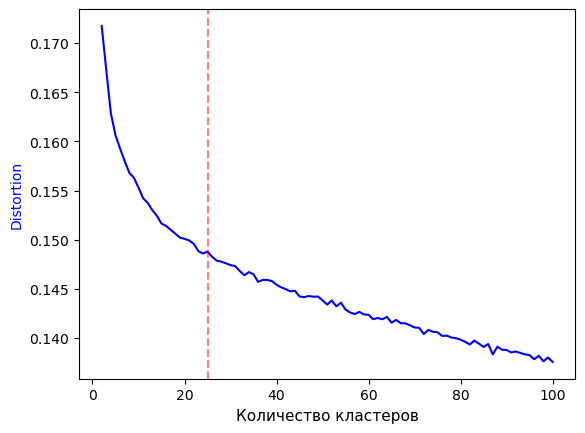

In [32]:
from scipy.cluster.vq import kmeans

codebooks = []
distortions = []

K = range(2, 101)

for k in tqdm(K):
    codebook, distortion = kmeans(data_pct, k)
    codebooks.append(codebook)
    distortions.append(distortion)
    
fig, ax = plt.subplots()

ax.plot(K, distortions, 'b-')
ax.axvline(x=25, color='red', linestyle='--', alpha=0.5)
ax.set_xlabel('Количество кластеров',  fontsize = 11)
ax.set_ylabel('Сумма квадратов расстояний', color='b',  fontsize = 10)

plt.show()